In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dstn, ifft2, fft2, ifftshift, fftshift 

from classicalfield import FiniteTempGPE as gpe 

In [4]:
from scipy.fft import idstn

Fixing the DST: 
- Take away one grid point from the border of the initial condition - then apply the dst to this new wavefunction without the border. The wavefunction without the border is the new initial condition
- make sure you make the box have one edge at x = 0 and the other at x = L - shift the coordinates 
- for the DST: 
    - n -> k
    - k -> x 
    - N -> L*dx 
    - Don't forget a possible factor of 2, N+1, etc. 

- The sine transform helps with boundary condition issues on the edge of the box 

In [31]:
vec = np.zeros(10)
vec[1] = 1

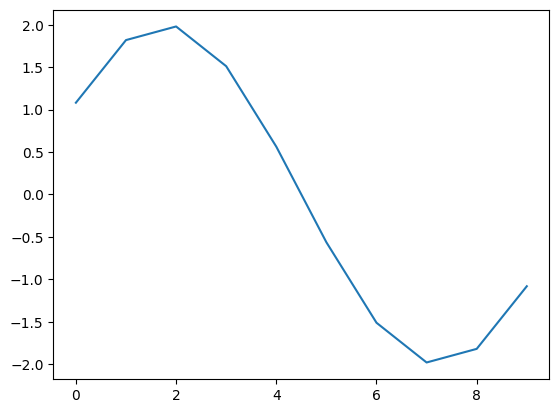

In [33]:
st_vec = dstn(vec, type = 1)
plt.plot(st_vec)


In [157]:
from scipy.fft import idst

[0. 1. 0. 0. 0.]
[ 0.14433757  0.14433757 -0.         -0.14433757 -0.14433757]


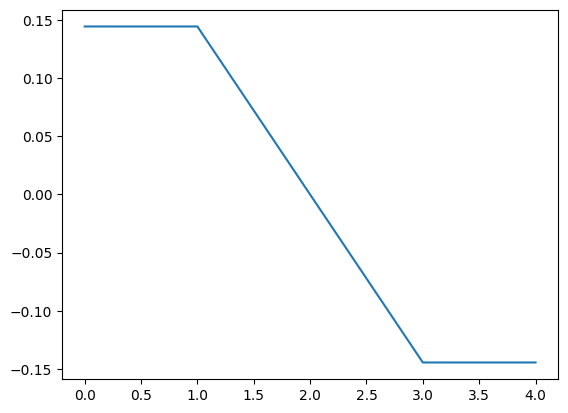

In [208]:
arr2 = np.zeros(5)
arr2[1] = 1

print(arr2) 

plt.plot(idst(arr2, type = 1))
print(idst(arr2, type = 1))

In [211]:
print(1/6*np.sin(5*np.pi/3))

-0.14433756729740643


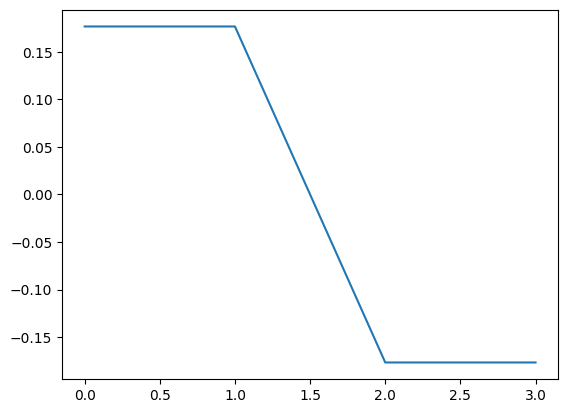

In [172]:
plt.plot(idst(arr[1]))

In [186]:
print(arr[5])
print(vec)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


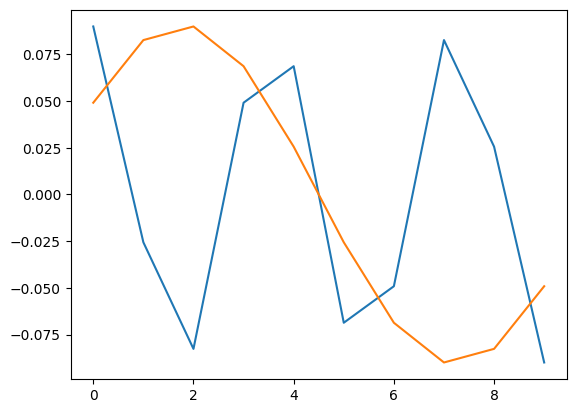

In [187]:

plt.plot(idst(arr[5], type = 1))
plt.plot(idst(vec, type = 1))

In [184]:
arr = np.zeros((10,10))
arr[5,5] = 1
print(arr)
L = 4
dx = 1
coef = L/dx**2
print(1/coef)
print(coef*np.sqrt(arr))
print(ifft2(coef*arr))

#print(idstn(arr))
print(np.sum(np.abs(ifft2(coef*arr))**2)*dx**2)

print('') 
print(idstn(arr))
print(np.sum(np.abs(idstn(1/(L/dx**2+1)*arr, type=1))**2)*dx**2)

print(1/(np.sum(np.abs(idstn(arr, type=1))**2)*dx**2))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0.25
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 0.04-0.00000000e+00j -0.04-0.00000000e+00j  0.04+2.22044605e-18j
  -0.04+2.22044605e-18j  0.04-0.00000000e+00j -0.04-0.00000000e+00j
   0.04+0.00000000e+00j -0.04-2.22044605e-18j  0.04-2.22044605e-18j
  -0.04+0.00000000e+00j]
 [-0.04+0.00000000e+00j  0.04+0.00000000e+00j -0.04-2.22044605e-18j
   0.04-2.22044605e-18j -0.04+0.0000

Notes: 
- Should the IDST still integrate to 1 if there is only one particle in the 2D system? 
- Continue to investigate what the coefficient should be for the noise to make sure the noise is the appropriate amount 
- Test the IDST for the 2 dimensional case to determine you understand how it works
- Compare the results in the 1d and 2d IDST cases to what you get for IFFT 

In [146]:
print(1/(np.sum(np.abs(idstn(1/(L/dx+1)*arr, type=1))**2)*dx**2))

25.000000000000004


In [2]:
g = gpe(numImagSteps=500, numRealSteps = 10, Nsamples=1, vortex = False)

No vortices to be spawned
Total Imag Time:  49.85865879058838


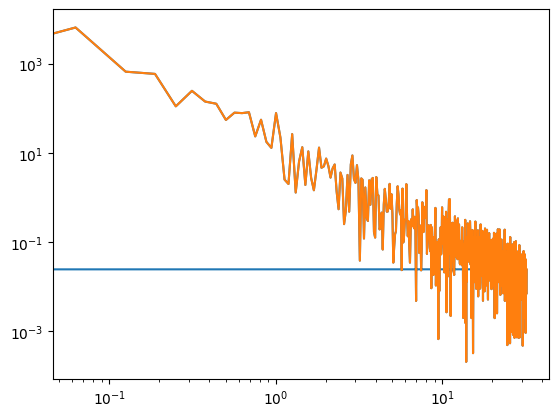

In [55]:
thermal_noise = g.genPsiK()

plt.figure() 
# plt.plot(g.ki[0][0], np.abs(thermal_noise[0])**2)

thermal_noise_shift = ifftshift(thermal_noise)
plt.plot(g.ki[0][0], np.abs(thermal_noise[0])**2) 
plt.plot(ifftshift(g.ki[0][0]), np.abs(thermal_noise_shift[len(thermal_noise_shift)//2])**2)


plt.yscale('log')
plt.xscale('log')
# shift the coordinate system 



(512, 512)


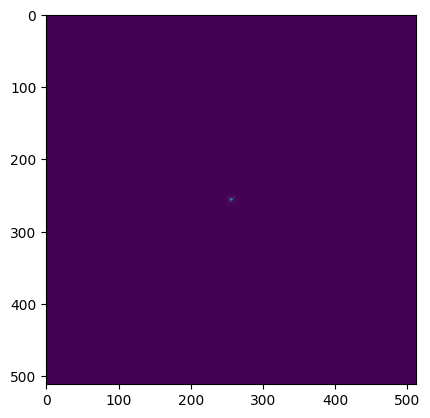

10485.76


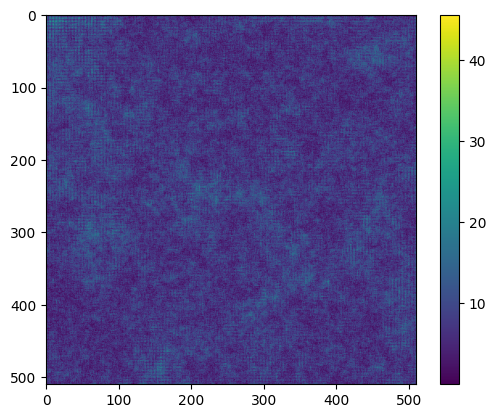

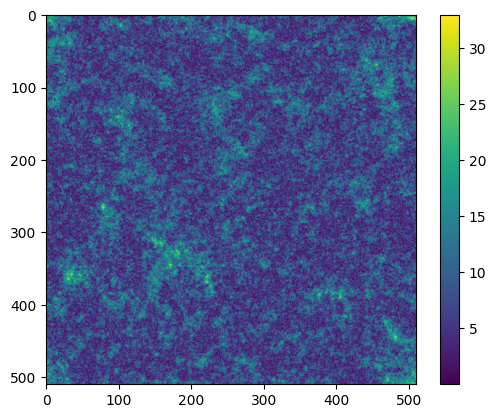

In [213]:
print(np.shape(thermal_noise_shift[256:768, 256:768]))

plt.figure()
plt.imshow(np.abs(thermal_noise_shift[256:768, 256:768])**2)
plt.show() 

thermal_noise_box = thermal_noise_shift[257:767, 257:767]
coef = (2*g.L/g.dx**2)
print(coef)

thermal_noise_dst = idstn(coef * thermal_noise_box, type = 1) 
thermal_noise_ifft = ifft2(coef/2 * thermal_noise_box)

plt.figure()
plt.imshow(np.abs(thermal_noise_dst))
plt.colorbar() 
plt.show() 

plt.figure()
plt.imshow(np.abs(thermal_noise_ifft))
plt.colorbar() 
plt.show()

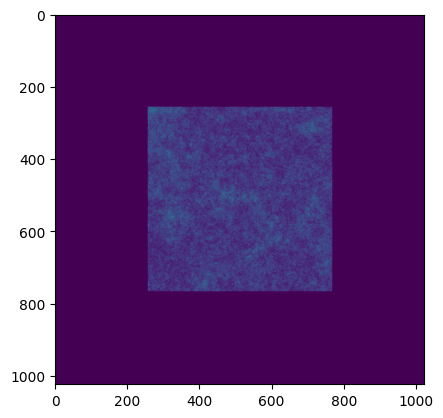

In [222]:
pad_arr = np.pad(thermal_noise_dst, pad_width = (len(g.gs)-len(thermal_noise_dst))//2, mode = 'constant', constant_values = 0)


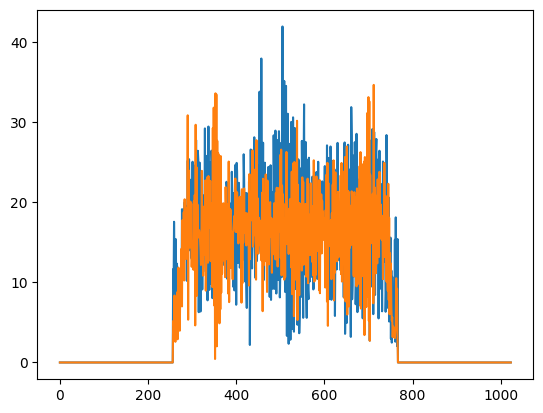

In [229]:
total_wfdens_idst = np.abs(np.pad(thermal_noise_dst, pad_width = (len(g.gs)-len(thermal_noise_dst))//2, mode = 'constant', constant_values = 0) + g.gs)**2
total_wfdens_ifft = np.abs(np.pad(thermal_noise_ifft, pad_width = (len(g.gs)-len(thermal_noise_ifft))//2, mode = 'constant', constant_values = 0) + g.gs)**2

plt.figure() 
plt.plot(total_wfdens_idst[len(total_wfdens_idst)//2]) 
plt.plot(total_wfdens_ifft[len(total_wfdens_ifft)//2])

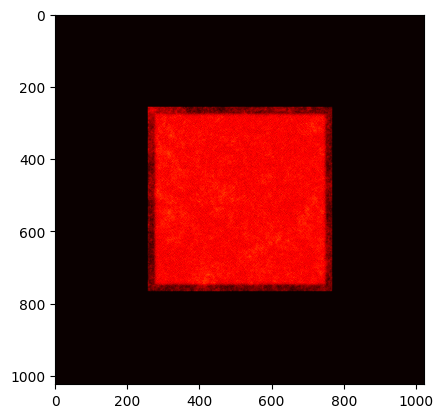

In [230]:
plt.figure() 
plt.imshow(total_wfdens_idst, cmap = plt.cm.hot)
plt.show() 

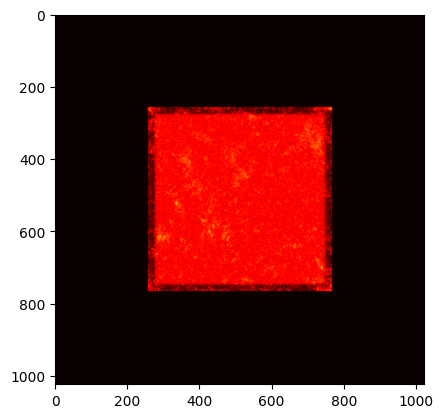

In [231]:
plt.figure() 
plt.imshow(total_wfdens_ifft, cmap = plt.cm.hot)
plt.show() 

In [ ]:
# need to extract the box and apply the dst to the inside 

box = g.extractBox(g.xi, g.wf_samples[0])

In [27]:
coef=g.winL/g.dx**2
ksamples = np.zeros((g.Nsamples, len(g.ki[0][0]), len(g.ki[0][0])), dtype = np.complex_)
psix_arr = np.zeros((g.Nsamples, len(g.ki[0][0]), len(g.ki[0][0])), dtype = np.complex_)
thermal_wf_samples = np.zeros((g.Nsamples, len(g.ki[0][0]), len(g.ki[0][0])), dtype = np.complex_)
for i in range(g.Nsamples): 
    ksamples[i] = g.genPsiK()
    #psik_sp = coef * (ksamples[i])
    psix_arr[i] = idstn(coef * ksamples[i], type = 1)

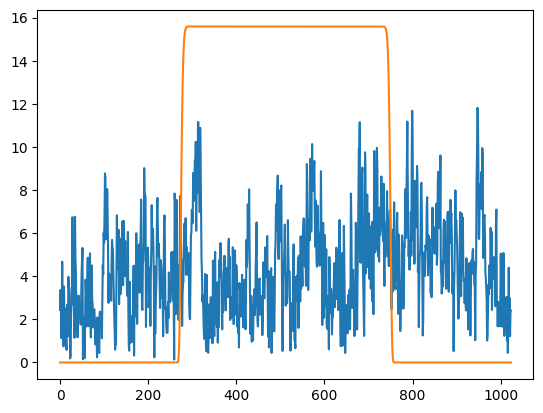

In [26]:
plt.plot(np.abs(psix_arr[0][0]))
plt.plot(np.abs(g.gs[len(g.gs)//2]))

In [4]:
def getNoise(self): 
    coef=self.winL/self.dx**2
    ksamples = np.zeros((self.Nsamples, len(self.ki[0][0]), len(self.ki[0][0])), dtype = np.complex_)
    psix_arr = np.zeros((self.Nsamples, len(self.ki[0][0]), len(self.ki[0][0])), dtype = np.complex_)
    thermal_wf_samples = np.zeros((self.Nsamples, len(self.ki[0][0]), len(self.ki[0][0])), dtype = np.complex_)
    for i in range(self.Nsamples): 
        ksamples[i] = self.genPsiK()
        psik_sp = coef * (ksamples[i])
        psix_arr[i] = ifft2(psik_sp) 
        thermal_sample = self.gs + psix_arr[i] 
        thermal_sample[np.abs(self.gs)<0.1] = 0
        norm = np.sum(np.abs(thermal_sample)**2 * self.dx**2)

        thermal_wf_samples[i] = np.sqrt(self.gpeobj.Natoms/norm)*thermal_sample
    average_result = np.mean(np.abs(coef*ksamples)**2, axis = 0, dtype = np.complex_) # average of the noisy k samples 

    self.wf_samples = thermal_wf_samples 
    self.average_thnoise = average_result 

    return thermal_wf_samples, average_result, psix_arr
    #return thermal_wf_samples, average_result 

def getNoise_dst(self): 
    coef=np.pi/g.winL
    ksamples = np.zeros((self.Nsamples, len(self.ki[0][0]), len(self.ki[0][0])), dtype = np.complex_)
    psix_arr = np.zeros((self.Nsamples, len(self.ki[0][0]), len(self.ki[0][0])), dtype = np.complex_)
    thermal_wf_samples = np.zeros((self.Nsamples, len(self.ki[0][0]), len(self.ki[0][0])), dtype = np.complex_)
    for i in range(self.Nsamples): 
        ksamples[i] = self.genPsiK()
        #psik_sp = coef * (ksamples[i])
        psix_arr[i] = dstn(coef*ksamples[i], type = 1)/4
        thermal_sample = self.gs + psix_arr[i] 
        thermal_sample[np.abs(self.gs)<0.1] = 0
        norm = np.sum(np.abs(thermal_sample)**2 * self.dx**2)

        thermal_wf_samples[i] = np.sqrt(self.gpeobj.Natoms/norm)*thermal_sample
    average_result = np.mean(np.abs(coef*ksamples)**2, axis = 0, dtype = np.complex_) # average of the noisy k samples 

    self.wf_samples = thermal_wf_samples 
    self.average_thnoise = average_result

    return thermal_wf_samples, average_result, psix_arr

In [5]:
wfk, avgk, thermal_noise_x = getNoise(g)
wfk_s, avgk_s, thermal_noise_x_s = getNoise_dst(g)

In [11]:
init_k_states = []
init_k_states2 = [] 
grid = g.extractBox(g.xi, wfk[0])[2]
grid2 = g.extractBox(g.xi,  wfk_s[0])[2]
for i in range(len(wfk)): 
    init_k_states.append(g.extractBox(g.xi, wfk[i])[3])
    init_k_states2.append(g.extractBox(g.xi, wfk_s[i])[3])

avg_initk = np.mean(np.abs(init_k_states)**2, axis = 0, dtype = np.complex_)
avg_initk2 = np.mean(np.abs(init_k_states2)**2, axis = 0, dtype = np.complex_)



C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


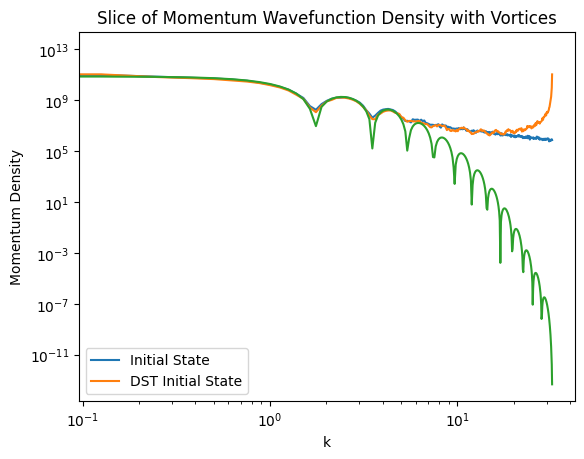

In [12]:
plt.figure() 
plt.plot(fftshift(grid), fftshift(avg_initk[0]), label = 'Initial State')
plt.plot(fftshift(grid2), fftshift(avg_initk2[0]), label = 'DST Initial State')
plt.plot(fftshift(grid), fftshift(np.abs(g.extractBox(g.xi, g.gs)[3][0]))**2)
plt.yscale('log') 
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('Momentum Density')
plt.title('Slice of Momentum Wavefunction Density with Vortices')
plt.legend() 
plt.show() 

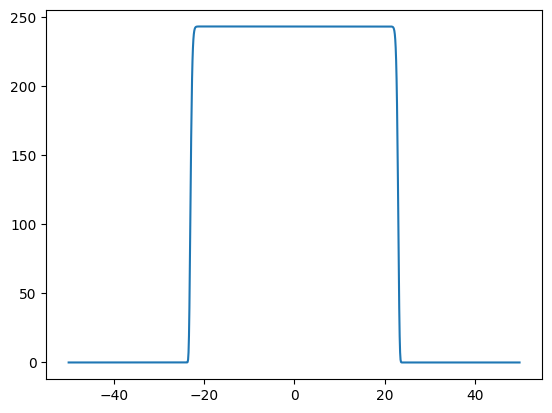

In [13]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.gs[len(g.gs[0])//2])**2)

In [37]:
def dst2d(self, wfk): 
    wfx_row = np.apply_along_axis(dst, axis = 1, arr = wfk, type = 2) 
    wfx = np.apply_along_axis(dst, axis = 0, arr = wfx_row, type = 2)
    return wfx

In [ ]:
# def getNoise_dst(self): 
#     coef=np.pi/self.winL
#     ksamples = np.zeros((self.Nsamples, len(self.ki[0][0]), len(self.ki[0][0])), dtype = np.complex_)
#     psix_arr = np.zeros((self.Nsamples, len(self.ki[0][0]), len(self.ki[0][0])), dtype = np.complex_)
#     thermal_wf_samples = np.zeros((self.Nsamples, len(self.ki[0][0]), len(self.ki[0][0])), dtype = np.complex_)
#     for i in range(self.Nsamples): 
#         ksamples[i] = self.genPsiK()
#         #psik_sp = coef * (ksamples[i])
#         psix_arr[i] = dstn(coef*ksamples[i], type = 1)/4
#         thermal_sample = self.gs + psix_arr[i] 
#         thermal_sample[np.abs(self.gs)<0.1] = 0
#         norm = np.sum(np.abs(thermal_sample)**2 * self.dx**2)

#         thermal_wf_samples[i] = np.sqrt(self.gpeobj.Natoms/norm)*thermal_sample
#     average_result = np.mean(np.abs(coef*ksamples)**2, axis = 0, dtype = np.complex_) # average of the noisy k samples 

#     self.wf_samples = thermal_wf_samples 
#     self.average_thnoise = average_result

In [115]:
avg_thermalnoisex = np.mean(thermal_noise_x, axis = 0, dtype = np.complex_)
avg_thermalnoisex_s = np.mean(thermal_noise_x_s, axis = 0, dtype = np.complex_)

In [120]:
avg_wf = np.mean(wfk, axis = 0, dtype = np.complex_)
avg_wf_s = np.mean(wfk_s, axis = 0, dtype = np.complex_)

In [116]:
print(np.shape(wfk_s))

(50, 1024, 1024)


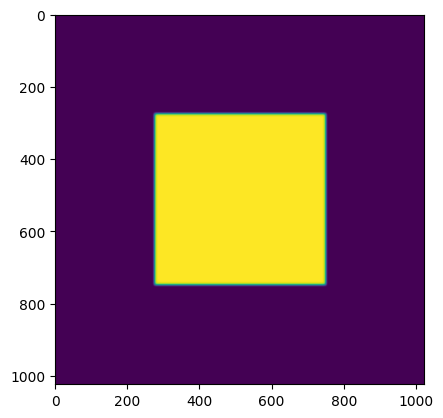

In [117]:
plt.figure() 
plt.imshow(np.abs(g.gs)**2)

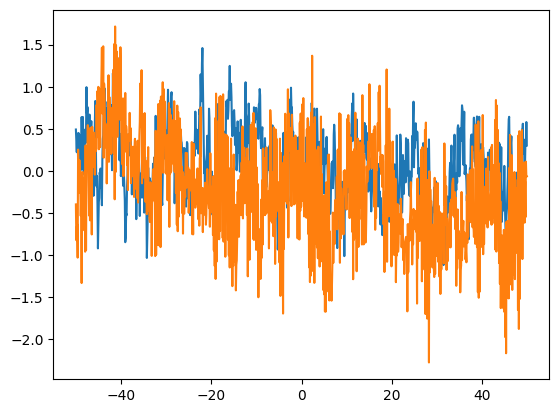

In [118]:
plt.figure() 
plt.plot(g.xi[0][0], avg_thermalnoisex[len(avg_thermalnoisex)//2])
plt.plot(g.xi[0][0], avg_thermalnoisex_s[len(avg_thermalnoisex_s)//2])

# seems ok - just missing normalization in the original function

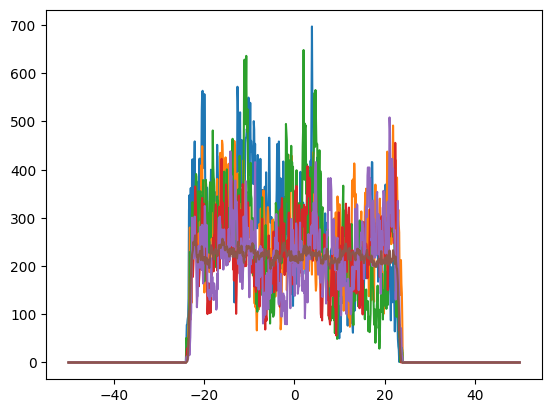

In [135]:
plt.figure() 
for i in range(5): 
    plt.plot(g.xi[0][0], np.abs(wfk[i][len(avg_wf)//2])**2)
plt.plot(g.xi[0][0], np.abs(avg_wf[len(avg_wf)//2])**2)
# plt.plot(g.xi[0][0], np.abs(avg_wf_s[len(avg_wf_s)//2])**2)

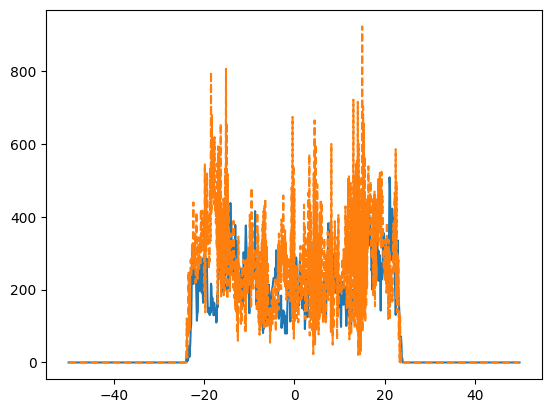

In [137]:
plt.plot(g.xi[0][0], np.abs(wfk[i][len(avg_wf)//2])**2)
plt.plot(g.xi[0][0], np.abs(wfk_s[i][len(avg_wf_s)//2])**2, linestyle = '--')

In [133]:
np.sum(np.abs(wfk_s[1])**2 * g.dx**2)

512000.0

C:\Users\TQC User\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


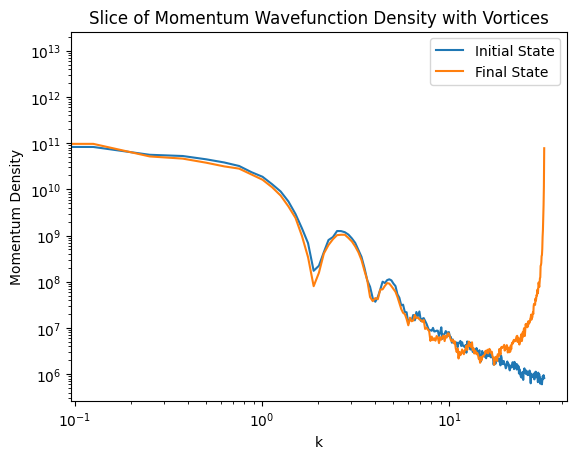

In [139]:
init_k_states = []
init_k_states2 = [] 
grid = g.extractBox(g.xi, wfk[0])[2]
grid2 = g.extractBox(g.xi,  wfk_s[0])[2]
for i in range(len(wfk)): 
    init_k_states.append(g.extractBox(g.xi, wfk[i])[3])
    init_k_states2.append(g.extractBox(g.xi, wfk_s[i])[3])

avg_initk = np.mean(np.abs(init_k_states)**2, axis = 0, dtype = np.complex_)
avg_initk2 = np.mean(np.abs(init_k_states2)**2, axis = 0, dtype = np.complex_)

plt.figure() 
plt.plot(fftshift(grid), fftshift(avg_initk[0]), label = 'Initial State')
plt.plot(fftshift(grid2), fftshift(avg_initk2[0]), label = 'Final State')
plt.yscale('log') 
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('Momentum Density')
plt.title('Slice of Momentum Wavefunction Density with Vortices')
plt.legend() 
plt.show() 


In [154]:
V = 0
height = g.gpeobj.kmax**2/2*3
for i in range(g.dim):
    V += height * np.array(np.power(np.e, -2*(g.xi[i] - np.ones_like(g.xi[i])*g.L/2)**2) + np.power(np.e, -2*(g.xi[i] + np.ones_like(g.xi[i])*g.L/2)**2))
    V[np.abs(g.xi[i])>g.L//2] = height 
V[V<g.gpeobj.tol] = 0.0

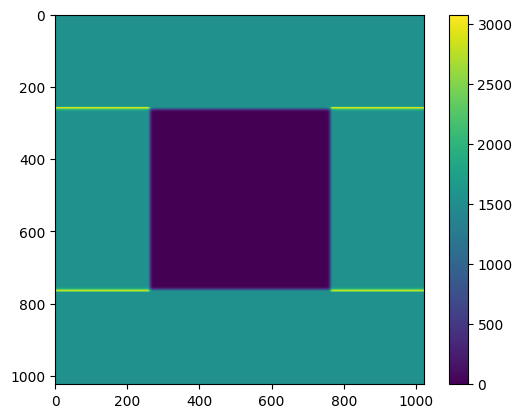

In [157]:
plt.imshow(V)
plt.colorbar()

In [ ]:
### also include the offset because the edge of the box is not at the origin

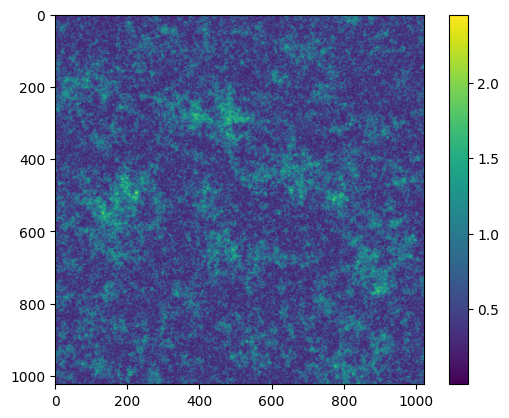

In [107]:
plt.figure() 
plt.imshow(np.abs(avg_thermalnoisex))
plt.colorbar() 

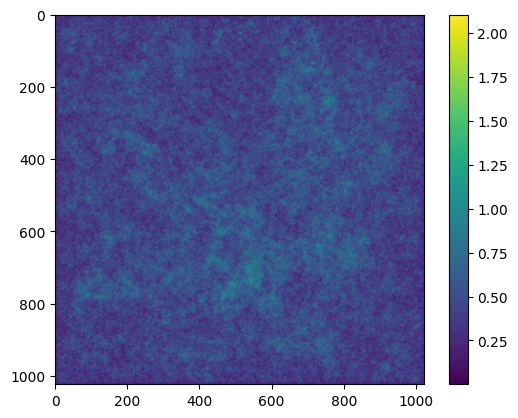

In [108]:
plt.figure() 
plt.imshow(np.abs(avg_thermalnoisex_s)/2)
plt.colorbar() 

In [ ]:
plt.figure() 
plt.plot(g.xi[0][0], thermal_noise_x[0][len(thermal_noise_x)//2]/max(thermal_noise_x[0][len(thermal_noise_x)//2]))

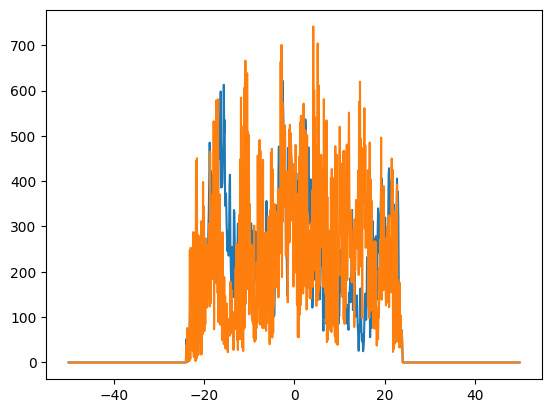

In [109]:
plt.figure()
plt.plot(g.xi[0][0], np.abs(wfk[0][len(wfk[0])//2])**2)
plt.plot(g.xi[0][0], np.abs(wfk_s[0][len(wfk_s[0])//2])**2)